<a href="https://colab.research.google.com/github/vincent4u/vince-file/blob/main/individual_workNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# uploading the csv_file
from google.colab import files
uploaded = files.upload()

Saving ce889_dataCollection.csv to ce889_dataCollection.csv


In [ ]:
# naming the csv_file
game_csv ="/content/ce889_dataCollection.csv"
data1 = pd.read_csv(game_csv)
data1.tail()

In [33]:
#creating a numpy list for the inputs and outputs
list_of_inputs=[]
list_of_targets=[]
for index, row in data1.iterrows():
    sublist1 = [row['x'], row['y']]
    sublist2=[row['vx'], row['vy']]
    list_of_inputs.append(sublist1)
    list_of_targets.append(sublist2)

#spiltting the input_list and output_list
x_train,x_test,y_train,y_test = train_test_split(list_of_inputs, list_of_targets, test_size=0.30, random_state=1)

# normalizing on x_train
x_train_min = np.min(x_train)
x_train_max = np.max(x_train)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

# normalizing on x_test
x_test_min = np.min(x_test)
x_test_max = np.max(x_test)
x_test_normalized = (x_test - x_test_min) / (x_test_max - x_test_min)

# normalizing on y_train
y_train_min = np.min(y_train)
y_train_max = np.max(y_train)
y_train_normalized = (y_train - y_train_min) / (y_train_max - y_train_min)

# normalizing on y_test
y_test_min = np.min(y_test)
y_test_max = np.max(y_test)
y_test_normalized = (y_test -y_test_min) / (y_test_max - y_test_min)

X_input=x_train_normalized
Y_output=y_train_normalized
#print(Y_train.shape)

x_test=x_test_normalized
y_test=y_test_normalized
print(x_test.shape)
#print(target)


(22813, 2)


In [ ]:
#this is the one i need to work with
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11)

class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        self.weight1 = np.random.uniform(-1, 1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1, 1, size=(self.hidden_nodes, self.output_nodes))

        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

    def __sigmoid(self, hidden_input):
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)

    def forward_propagation(self, input):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2

    def backpropagation(self, input, target):
        X_input = input
        Y_output = target

        predicted_output = self.forward_propagation(X_input)
        error_output = Y_output - predicted_output

        delta_y = error_output * self.__sigmoid_derivative(predicted_output)

        error_hidden2 = delta_y.dot(self.weight2.T)
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)

        error_hidden1 = delta_hidden2.dot(self.weight1.T)
        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)

        weight2_adjustment = self.learn_rate * np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate * np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment

def train_model(X_train, Y_train, X_test, Y_test, num_epochs=100):
    mlp = NN()
    train_rmse_values = []
    test_rmse_values = []

    for epoch in range(num_epochs):
        train_errors = []
        test_errors = []

        for i in range(len(X_train)):
            train_input = X_train[i]
            train_target = Y_train[i]
            train_output = mlp.forward_propagation(train_input)
            mlp.backpropagation(train_input, train_target)
            train_output_after_bp = mlp.forward_propagation(train_input)
            train_error = train_target - train_output_after_bp
            train_errors.append(train_error)

        for i in range(len(X_test)):
            test_input = X_test[i]
            test_target = Y_test[i]
            test_output = mlp.forward_propagation(test_input)
            test_output_after_bp = mlp.forward_propagation(test_input)
            test_error = test_target - test_output_after_bp
            test_errors.append(test_error)

        train_rmse = np.sqrt(np.mean(np.square(train_errors)))
        test_rmse = np.sqrt(np.mean(np.square(test_errors)))
        train_rmse_values.append(train_rmse)
        test_rmse_values.append(test_rmse)
        print("Epoch {}: Train RMSE: {}, Test RMSE: {}".format(epoch + 1, train_rmse, test_rmse))

    epochs = np.arange(1, num_epochs + 1)
    plt.plot(epochs, train_rmse_values, label="Train")
    plt.plot(epochs, test_rmse_values, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epoch")
    plt.legend()
    plt.show()

    return train_rmse_values, test_rmse_values

def test_model(X_test, mlp):
    test_outputs = []
    for test_input in X_test:
        test_output = mlp.forward_propagation(test_input)
        test_outputs.append(test_output)
    return test_outputs

if __name__ == "__main__":
    X_train = X_input
    Y_train = Y_output
    X_test = x_test
    Y_test = y_test

    train_rmse_values, test_rmse_values = train_model(X_train, Y_train, X_test, Y_test, num_epochs=100)

    best_epoch = np.argmin(test_rmse_values) +1
    lowest_rmse = test_rmse_values[best_epoch - 1]

    mlp = NN()
    mlp.weight1 = np.copy(mlp.weight1)
    mlp.weight2 = np.copy(mlp.weight2)

    best_weights = [mlp.weight1, mlp.weight2]

    print("Best epoch:", best_epoch + 1)
    print("Lowest RMSE:", lowest_rmse)
    print("Best weight1:\n", best_weights[0])
    print("Best weight2:\n", best_weights[1])

Epoch 1: Train RMSE: 0.10437396708334672, Test RMSE: 0.1032847812820409
Epoch 2: Train RMSE: 0.10382232278177474, Test RMSE: 0.10277757362982011
Epoch 3: Train RMSE: 0.10299914092210907, Test RMSE: 0.10157854230324333
Epoch 4: Train RMSE: 0.10128305430198899, Test RMSE: 0.09949810651165218
Epoch 5: Train RMSE: 0.0992784365971305, Test RMSE: 0.0980355046721953
Epoch 6: Train RMSE: 0.09840496625452182, Test RMSE: 0.09772831849589284
Epoch 7: Train RMSE: 0.09825477147639185, Test RMSE: 0.09770309164817
Epoch 8: Train RMSE: 0.09823522657047877, Test RMSE: 0.09770458191784191
Epoch 9: Train RMSE: 0.09823092237306895, Test RMSE: 0.09770725065761536
Epoch 10: Train RMSE: 0.0982289850113713, Test RMSE: 0.097709351902779
Epoch 11: Train RMSE: 0.09822764225593028, Test RMSE: 0.09771080954741729
Epoch 12: Train RMSE: 0.09822645496871041, Test RMSE: 0.09771164126650517
Epoch 13: Train RMSE: 0.098225250748437, Test RMSE: 0.09771188048826124
Epoch 14: Train RMSE: 0.09822394888835603, Test RMSE: 0.09

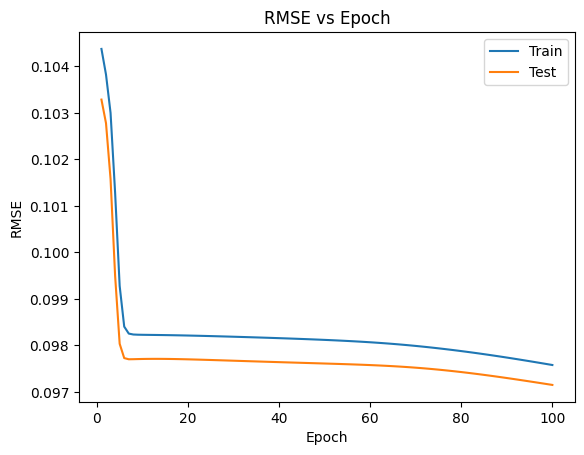

Best epoch: 100
Lowest RMSE: 0.09715156288238175
Best weight1:
 [[ 7.83880409 -5.1195694 ]
 [-3.81370523  2.27519197]]
Best weight2:
 [[ 0.36381542  0.45341808]
 [-0.42604317 -1.52385264]]


In [36]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11)

class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        self.weight1 = np.random.uniform(-1, 1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1, 1, size=(self.hidden_nodes, self.output_nodes))

        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

    def __sigmoid(self, hidden_input):
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)

    def forward_propagation(self, input):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2

    def backpropagation(self, input, target):
        X_input = input
        Y_output = target

        predicted_output = self.forward_propagation(X_input)
        error_output = Y_output - predicted_output

        delta_y = error_output * self.__sigmoid_derivative(predicted_output)

        error_hidden2 = delta_y.dot(self.weight2.T)
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)

        error_hidden1 = delta_hidden2.dot(self.weight1.T)
        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)

        weight2_adjustment = self.learn_rate * np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate * np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment

def train_model(X_train, Y_train, X_test, Y_test, num_epochs=100):
    mlp = NN()
    train_rmse_values = []
    test_rmse_values = []

    best_rmse = np.inf
    best_weights = None

    for epoch in range(num_epochs):
        train_errors = []
        test_errors = []

        for i in range(len(X_train)):
            train_input = X_train[i]
            train_target = Y_train[i]
            train_output = mlp.forward_propagation(train_input)
            mlp.backpropagation(train_input, train_target)
            train_output_after_bp = mlp.forward_propagation(train_input)
            train_error = train_target - train_output_after_bp
            train_errors.append(train_error)

        for i in range(len(X_test)):
            test_input = X_test[i]
            test_target = Y_test[i]
            test_output = mlp.forward_propagation(test_input)
            test_output_after_bp = mlp.forward_propagation(test_input)
            test_error = test_target - test_output_after_bp
            test_errors.append(test_error)

        train_rmse = np.sqrt(np.mean(np.square(train_errors)))
        test_rmse = np.sqrt(np.mean(np.square(test_errors)))
        train_rmse_values.append(train_rmse)
        test_rmse_values.append(test_rmse)
        print("Epoch {}: Train RMSE: {}, Test RMSE: {}".format(epoch + 1, train_rmse, test_rmse))

        if test_rmse < best_rmse:
            best_rmse = test_rmse
            best_weights = [np.copy(mlp.weight1), np.copy(mlp.weight2)]

    epochs = np.arange(1, num_epochs + 1)
    plt.plot(epochs, train_rmse_values, label="Train")
    plt.plot(epochs, test_rmse_values, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epoch")
    plt.legend()
    plt.show()

    return train_rmse_values, test_rmse_values, best_weights

def test_model(X_test, weights):
    mlp = NN()
    mlp.weight1 = np.copy(weights[0])
    mlp.weight2 = np.copy(weights[1])

    test_outputs = []
    for test_input in X_test:
        test_output = mlp.forward_propagation(test_input)
        test_outputs.append(test_output)
    return test_outputs

if __name__ == "__main__":
    X_train = X_input
    Y_train = Y_output
    X_test = x_test
    Y_test = y_test

    train_rmse_values, test_rmse_values, best_weights = train_model(X_train, Y_train, X_test, Y_test, num_epochs=100)

    best_epoch = np.argmin(test_rmse_values) + 1
    lowest_rmse = test_rmse_values[best_epoch - 1]
    best_weights = best_weights

    print("Best epoch:", best_epoch)
    print("Lowest RMSE:", lowest_rmse)
    print("Best weight1:\n", best_weights[0])
    print("Best weight2:\n", best_weights[1])

RMSE after epoch 1: 0.09558990017091615
RMSE after epoch 2: 0.09501332214210301
RMSE after epoch 3: 0.09498222677333804
RMSE after epoch 4: 0.09494532699558862
RMSE after epoch 5: 0.09490086192387766
RMSE after epoch 6: 0.09484653925115187
RMSE after epoch 7: 0.09477934951215793
RMSE after epoch 8: 0.09469533432505874
RMSE after epoch 9: 0.0945893254113696
RMSE after epoch 10: 0.09445472020875581
RMSE after epoch 11: 0.09428346654427625
RMSE after epoch 12: 0.09406662254111296
RMSE after epoch 13: 0.09379610957882072
RMSE after epoch 14: 0.0934683273107483
RMSE after epoch 15: 0.09308945820085308
RMSE after epoch 16: 0.09267987871455076
RMSE after epoch 17: 0.09227257928615075
RMSE after epoch 18: 0.09190273555669584
RMSE after epoch 19: 0.09159402452220261
RMSE after epoch 20: 0.09135208704720607
RMSE after epoch 21: 0.09116855377660094
RMSE after epoch 22: 0.09102961028035945
RMSE after epoch 23: 0.09092237981240464
RMSE after epoch 24: 0.09083732334657348
RMSE after epoch 25: 0.0907

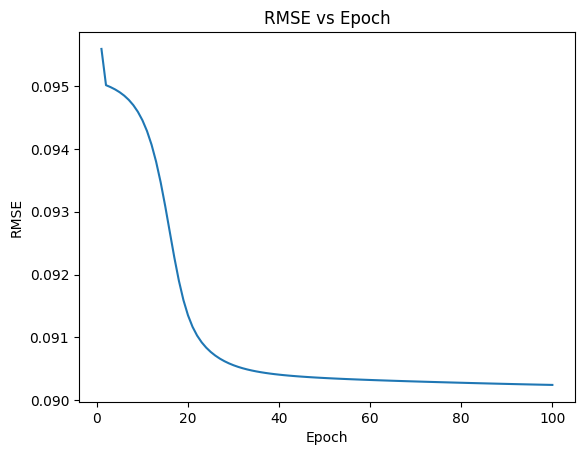

In [ ]:
#working fine
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)
class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        self.weight1 = np.random.uniform(-1,1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1,1, size=(self.hidden_nodes, self.output_nodes))


        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

    def __sigmoid(self, hidden_input):
      # lambda instead of LR
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)
        #return x * (1 - x)

    def forward_propagation(self, input):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2
        #print(self.activated_hidden_output2)

    def backpropagation(self, input, target):
        X_input = input
        Y_output=target

        predicted_output = self.forward_propagation(X_input)
        error_output = Y_output -  predicted_output
        #print("The error_output is: {}".format(error_output))
        #print('the errors', errors)
        #errors.append(error_output) #correct


        delta_y = error_output * self.__sigmoid_derivative(predicted_output)    #correct


        error_hidden2 = delta_y.dot(self.weight2.T)
        #print('this is the self weight2', error_hidden2)
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)

        error_hidden1 = delta_hidden2.dot(self.weight1.T)
        #print('the error', error_hidden1)
        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)

        weight2_adjustment = self.learn_rate*np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate*np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment



if __name__ == "__main__":
    input = X_input
    target = Y_output
    num_epochs=100


    mlp = NN()
    rmse_values = []
    for epoch in range(num_epochs):
      #print("Epoch:", epoch + 1)
      errors = []

      for i in range(len(X_input)):
        input = X_input[i]
        target = Y_output[i]
        output = mlp.forward_propagation(input)
        #print("The inputs are: {}".format(input))
        #print("The outputs are: {}".format(output))

        mlp.backpropagation(input, target)
        output_after_bp = mlp.forward_propagation(input)
        #print("The outputs after backpropagation are: {}".format(output_after_bp))

        error = target - output_after_bp
        errors.append(error)

      rmse = np.sqrt(np.mean(np.square(errors)))
      rmse_values.append(rmse)
      print("RMSE after epoch {}: {}".format(epoch + 1, rmse))

    epochs = np.arange(1, num_epochs + 1)
    plt.plot(epochs, rmse_values)
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epoch")
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)
class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        self.weight1 = np.random.uniform(-1,1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1,1, size=(self.hidden_nodes, self.output_nodes))


        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

    def __sigmoid(self, hidden_input):
      # lambda instead of LR
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)


    def forward_propagation(self, input):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2


    def backpropagation(self, input, target):
        X_input = input
        Y_output=target

        #implementing the forward_propagation and calculating the error per input values
        predicted_output = self.forward_propagation(X_input)
        error_output = Y_output -  predicted_output


        #calculating gradient at y (minute changes in y_output node)
        delta_y = error_output * self.__sigmoid_derivative(predicted_output)

        #matrix multiplication of gradient @ y and the self.weight @ outer layer
        error_hidden2 = delta_y.dot(self.weight2.T)

        #calculating gradient at h2 (minute changes in h2_output node)
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)

        error_hidden1 = delta_hidden2.dot(self.weight1.T)

        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)

        weight2_adjustment = self.learn_rate*np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate*np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment



if __name__ == "__main__":
    input = X_input
    target = Y_output
    num_epochs=100


    mlp = NN()
    rmse_values = []
    best_epoch = -1
    lowest_rmse = float('inf')
    for epoch in range(num_epochs):
      #print("Epoch:", epoch + 1)
      errors = []

      for i in range(len(X_input)):
        input = X_input[i]
        target = Y_output[i]
        output = mlp.forward_propagation(input)


        mlp.backpropagation(input, target)
        output_after_bp = mlp.forward_propagation(input)


        error = target - output_after_bp
        errors.append(error)

      rmse = np.sqrt(np.mean(np.square(errors)))
      rmse_values.append(rmse)
      print("RMSE after epoch {}: {}".format(epoch + 1, rmse))

      if rmse < lowest_rmse:
        lowest_rmse = rmse
        best_epoch = epoch
    print("Best epoch:", best_epoch + 1)
    print("Lowest RMSE:", lowest_rmse)
    print("Weight1 at best epoch:\n", mlp.weight1)
    print("Weight2 at best epoch:\n", mlp.weight2)

    epochs = np.arange(1, num_epochs + 1)
    plt.plot(epochs, rmse_values)
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epoch")
    plt.show()


RMSE after epoch 1: 0.09558990017091615
RMSE after epoch 2: 0.09501332214210301
RMSE after epoch 3: 0.09498222677333804
RMSE after epoch 4: 0.09494532699558862
RMSE after epoch 5: 0.09490086192387766
RMSE after epoch 6: 0.09484653925115187
RMSE after epoch 7: 0.09477934951215793
RMSE after epoch 8: 0.09469533432505874
RMSE after epoch 9: 0.0945893254113696
RMSE after epoch 10: 0.09445472020875578
RMSE after epoch 11: 0.09428346654427625
RMSE after epoch 12: 0.09406662254111296
RMSE after epoch 13: 0.09379610957882072
RMSE after epoch 14: 0.0934683273107483
RMSE after epoch 15: 0.09308945820085308
RMSE after epoch 16: 0.09267987871455076
RMSE after epoch 17: 0.09227257928615075
RMSE after epoch 18: 0.09190273555669583
RMSE after epoch 19: 0.0915940245222026
RMSE after epoch 20: 0.09135208704720606
RMSE after epoch 21: 0.09116855377660094
RMSE after epoch 22: 0.09102961028035944
RMSE after epoch 23: 0.09092237981240464
RMSE after epoch 24: 0.09083732334657348


KeyboardInterrupt: ignored

In [ ]:
#from re import X
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)
class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        self.weight1 = np.random.uniform(-1,1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1,1, size=(self.hidden_nodes, self.output_nodes))


        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

    def __sigmoid(self, hidden_input):
      # lambda instead of LR
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)
        #return x * (1 - x)

    def forward_propagation(self, input):
      #for i in range(len(X_input)):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2
        print(self.activated_hidden_output2)

    def backpropagation(self, input, target):
        X_input = input
        Y_output=target

        predicted_output = self.forward_propagation(X_input)
        error_output = Y_output -  predicted_output
        #print("The error_output is: {}".format(error_output))
        #print('the errors', errors)
        #errors.append(error_output) #correct


        delta_y = error_output * self.__sigmoid_derivative(predicted_output)    #correct


        error_hidden2 = delta_y.dot(self.weight2.T)
        #print('this is the self weight2', error_hidden2)
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)

        error_hidden1 = delta_hidden2.dot(self.weight1.T)
        #print('the error', error_hidden1)
        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)

        weight2_adjustment = self.learn_rate*np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate*np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment

def train_model(X_train, Y_train, X_test, Y_test, num_epochs=100):
    mlp = NN()
    train_rmse_values = []
    test_rmse_values = []

    for epoch in range(num_epochs):
        train_errors = []
        test_errors = []

        for i in range(len(X_train)):
            train_input = X_input[i]
            train_target = Y_output[i]
            train_output = mlp.forward_propagation(train_input)
            mlp.backpropagation(train_input, train_target)
            train_output_after_bp = mlp.forward_propagation(train_input)
            train_error = train_target - train_output_after_bp
            train_errors.append(train_error)

def test_model(X_test, mlp):
    test_outputs = []
    for test_input in X_test:
        test_output = mlp.forward_propagation(test_input)
        test_outputs.append(test_output)
    return test_outputs

# Example usage
# After training the model using the train_model function
best_epoch, lowest_rmse, best_weights = train_model(X_train, Y_train, X_test, Y_test, num_epochs=100)

# Create a new instance of NN and assign the best weights
mlp_best_weights = NN()
mlp_best_weights.weight1 = best_weights[0]
mlp_best_weights.weight2 = best_weights[1]

# Perform forward propagation on the test dataset using the best weights
test_outputs = test_model(X_test, mlp_best_weights)

        for i in range(len(X_test)):
            test_input = x_test[i]
            test_target = y_test[i]
            test_output = mlp.forward_propagation(test_input)
            test_output_after_bp = mlp.forward_propagation(test_input)
            test_error = test_target - test_output_after_bp
            test_errors.append(test_error)

        train_rmse = np.sqrt(np.mean(np.square(train_errors)))
        test_rmse = np.sqrt(np.mean(np.square(test_errors)))
        train_rmse_values.append(train_rmse)
        test_rmse_values.append(test_rmse)
        print("Epoch {}: Train RMSE: {}, Test RMSE: {}".format(epoch + 1, train_rmse, test_rmse))

    epochs = np.arange(1, num_epochs + 1)
    plt.plot(epochs, train_rmse_values, label="Train")
    plt.plot(epochs, test_rmse_values, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epoch")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    X_train = x_train
    Y_train = y_train
    X_test = x_test
    Y_test = y_test

    train_model(X_train, Y_train, X_test, Y_test, num_epochs=100)

Epoch 1: Train RMSE: 0.09558990017091615, Test RMSE: 0.1012597659321386
Epoch 2: Train RMSE: 0.09501332214210301, Test RMSE: 0.10123237101034778
Epoch 3: Train RMSE: 0.09498222677333804, Test RMSE: 0.10119998579260656
Epoch 4: Train RMSE: 0.09494532699558862, Test RMSE: 0.10116106644463674
Epoch 5: Train RMSE: 0.09490086192387766, Test RMSE: 0.1011136194566106


KeyboardInterrupt: ignored

Epoch 1: Train RMSE: 0.09558990017091615, Test RMSE: 0.1012597659321386
Epoch 2: Train RMSE: 0.09501332214210301, Test RMSE: 0.10123237101034778
Epoch 3: Train RMSE: 0.09498222677333804, Test RMSE: 0.10119998579260656
Epoch 4: Train RMSE: 0.09494532699558862, Test RMSE: 0.10116106644463674
Epoch 5: Train RMSE: 0.09490086192387766, Test RMSE: 0.1011136194566106
Epoch 6: Train RMSE: 0.09484653925115187, Test RMSE: 0.10105504122660448
Epoch 7: Train RMSE: 0.09477934951215793, Test RMSE: 0.10098191309596591
Epoch 8: Train RMSE: 0.09469533432505874, Test RMSE: 0.10088975738212166
Epoch 9: Train RMSE: 0.0945893254113696, Test RMSE: 0.10077279150819071
Epoch 10: Train RMSE: 0.09445472020875578, Test RMSE: 0.10062379098043338
Epoch 11: Train RMSE: 0.09428346654427625, Test RMSE: 0.10043431893465703
Epoch 12: Train RMSE: 0.09406662254111296, Test RMSE: 0.10019581284756525
Epoch 13: Train RMSE: 0.09379610957882072, Test RMSE: 0.09990222245126007
Epoch 14: Train RMSE: 0.0934683273107483, Test RMS

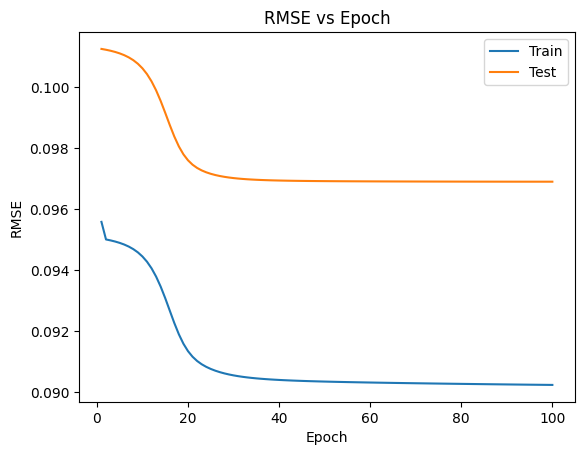

Best epoch: 100
Lowest RMSE: 0.09690710728561362
Best weight1:
 None
Best weight2:
 None


TypeError: ignored

In [ ]:
#check this out
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11)

class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        self.weight1 = np.random.uniform(-1, 1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1, 1, size=(self.hidden_nodes, self.output_nodes))

        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

    def __sigmoid(self, hidden_input):
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)

    def forward_propagation(self, input):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2

    def backpropagation(self, input, target):
        X_input = input
        Y_output = target

        predicted_output = self.forward_propagation(X_input)
        error_output = Y_output - predicted_output

        delta_y = error_output * self.__sigmoid_derivative(predicted_output)

        error_hidden2 = delta_y.dot(self.weight2.T)
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)

        error_hidden1 = delta_hidden2.dot(self.weight1.T)
        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)

        weight2_adjustment = self.learn_rate * np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate * np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment

def train_model(X_train, Y_train, X_test, Y_test, num_epochs=100):
    mlp = NN()
    train_rmse_values = []
    test_rmse_values = []

    for epoch in range(num_epochs):
        train_errors = []
        test_errors = []

        for i in range(len(X_train)):
            train_input = X_train[i]
            train_target = Y_train[i]
            train_output = mlp.forward_propagation(train_input)
            mlp.backpropagation(train_input, train_target)
            train_output_after_bp = mlp.forward_propagation(train_input)
            train_error = train_target - train_output_after_bp
            train_errors.append(train_error)

        for i in range(len(X_test)):
            test_input = X_test[i]
            test_target = Y_test[i]
            test_output = mlp.forward_propagation(test_input)
            test_output_after_bp = mlp.forward_propagation(test_input)
            test_error = test_target - test_output_after_bp
            test_errors.append(test_error)

        train_rmse = np.sqrt(np.mean(np.square(train_errors)))
        test_rmse = np.sqrt(np.mean(np.square(test_errors)))
        train_rmse_values.append(train_rmse)
        test_rmse_values.append(test_rmse)
        print("Epoch {}: Train RMSE: {}, Test RMSE: {}".format(epoch + 1, train_rmse, test_rmse))

    epochs = np.arange(1, num_epochs + 1)
    plt.plot(epochs, train_rmse_values, label="Train")
    plt.plot(epochs, test_rmse_values, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Epoch")
    plt.legend()
    plt.show()

    return train_rmse_values, test_rmse_values

def test_model(X_test, mlp):
    test_outputs = []
    for test_input in X_test:
        test_output = mlp.forward_propagation(test_input)
        test_outputs.append(test_output)
    return test_outputs

if __name__ == "__main__":
    X_train = X_input
    Y_train = Y_output
    X_test = x_test
    Y_test = y_test

train_rmse_values, test_rmse_values = train_model(X_train, Y_train, X_test, Y_test, num_epochs=100)

best_epoch = np.argmin(test_rmse_values) + 1
lowest_rmse = test_rmse_values[best_epoch - 1]

best_weights = [mlp.weight1, mlp.weight2]

# Create a new instance of NN and assign the best weights
mlp_best_weights = NN()
mlp_best_weights.weight1 = best_weights[0]
mlp_best_weights.weight2 = best_weights[1]
print("Best epoch:", best_epoch + 1)
print("Lowest RMSE:", lowest_rmse)
print("Best weight1:\n", mlp_best_weights.weight1 )
print("Best weight2:\n", mlp_best_weights.weight2)


    # Perform forward propagation on the test dataset using the best weights

test_outputs = test_model(X_test, mlp_best_weights)

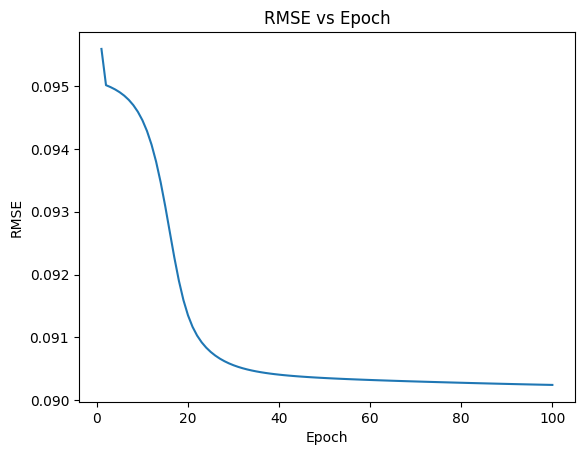

Best epoch: 100
Lowest RMSE: 0.09024418834280325
Best weight1:
 [[ 0.11067614 -1.81874743]
 [ 1.65098098  0.49467596]]
Best weight2:
 [[-0.48793212  2.60084518]
 [ 1.11035864 -5.07316171]]
Outputs on testing dataset:
[[0.51508314 0.48621679]
 [0.50989341 0.51248186]
 [0.51816047 0.4683008 ]
 ...
 [0.512344   0.49782948]
 [0.51713636 0.47434765]
 [0.51902165 0.46760153]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

class NN:
    def __init__(self, learn_rate=0.1, lamda=0.8, input_nodes=2, hidden_nodes=2, output_nodes=2):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learn_rate = learn_rate
        self.lamda = lamda

        self.weight1 = np.random.uniform(-1, 1, size=(self.input_nodes, self.hidden_nodes))
        self.weight2 = np.random.uniform(-1, 1, size=(self.hidden_nodes, self.output_nodes))
        self.activated_hidden_output1 = None
        self.activated_hidden_output2 = None

    def __sigmoid(self, hidden_input):
        return 1 / (1 + np.exp(-1 * self.lamda * hidden_input))

    def __sigmoid_derivative(self, x):
        return self.lamda * x * (1 - x)

    def forward_propagation(self, input):
        X_input = input
        hidden_input1 = np.dot(X_input, self.weight1)
        self.activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.activated_hidden_output1, self.weight2)
        self.activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return self.activated_hidden_output2

    def backpropagation(self, input, target):
        X_input = input
        Y_output = target

        predicted_output = self.forward_propagation(X_input)
        error_output = Y_output - predicted_output
        delta_y = error_output * self.__sigmoid_derivative(predicted_output)

        error_hidden2 = delta_y.dot(self.weight2.T)
        delta_hidden2 = error_hidden2 * self.__sigmoid_derivative(self.activated_hidden_output2)

        error_hidden1 = delta_hidden2.dot(self.weight1.T)
        delta_hidden1 = error_hidden1 * self.__sigmoid_derivative(self.activated_hidden_output1)

        weight2_adjustment = self.learn_rate * np.outer(self.activated_hidden_output1, delta_y)
        weight1_adjustment = self.learn_rate * np.outer(X_input, delta_hidden1)

        self.weight2 += weight2_adjustment
        self.weight1 += weight1_adjustment

    def training(self, X_train, Y_train, num_epochs):
        rmse_values = []
        best_epoch = -1
        lowest_rmse = float('inf')

        for epoch in range(num_epochs):
            errors = []

            for i in range(len(X_train)):
                input = X_input[i]
                target = Y_output[i]
                output = self.forward_propagation(input)
                self.backpropagation(input, target)
                output_after_bp = self.forward_propagation(input)
                error = target - output_after_bp
                errors.append(error)

            rmse = np.sqrt(np.mean(np.square(errors)))
            rmse_values.append(rmse)

            if rmse < lowest_rmse:
                lowest_rmse = rmse
                best_epoch = epoch

        self.plot_rmse_vs_epoch(num_epochs, rmse_values)

        return best_epoch, lowest_rmse, self.weight1, self.weight2

    @staticmethod
    def plot_rmse_vs_epoch(num_epochs, rmse_values):
        epochs = np.arange(1, num_epochs + 1)
        plt.plot(epochs, rmse_values)
        plt.xlabel("Epoch")
        plt.ylabel("RMSE")
        plt.title("RMSE vs Epoch")
        plt.show()

    def forward_propagation_testing(self, input):
        hidden_input1 = np.dot(input, self.weight1)
        activated_hidden_output1 = self.__sigmoid(hidden_input1)

        hidden_input2 = np.dot(activated_hidden_output1, self.weight2)
        activated_hidden_output2 = self.__sigmoid(hidden_input2)

        return activated_hidden_output2


if __name__ == "__main__":
    X_train = X_input
    Y_train = Y_output
    num_epochs = 100

    mlp = NN()
    best_epoch, lowest_rmse, weight1, weight2 = mlp.training(X_train, Y_train, num_epochs)

    print("Best epoch:", best_epoch + 1)
    print("Lowest RMSE:", lowest_rmse)
    print("Best weight1:\n", weight1)
    print("Best weight2:\n", weight2)
    X_test = x_test

    # Perform forward propagation on the testing dataset using the weights from the lowest RMSE epoch
    outputs = mlp.forward_propagation_testing(X_test)

    # Print the outputs
    print("Outputs on testing dataset:")
    print(outputs)